In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
df_path = 'dataset/state_media_on_social_media_platforms.xlsx'
df = pd.read_excel(df_path)
df.head()

,Name (English),Name (Chinese),Region of Focus,Language,Entity owner (English),Entity owner (Chinese),Parent entity (English),Parent entity (Chinese),X (Twitter) handle,X (Twitter) URL,...,Instagram Follower #,Threads account,Threads URL,Threads Follower #,YouTube account,YouTube URL,YouTube Subscriber #,TikTok account,TikTok URL,TikTok Subscriber #
0,Yang Xinmeng (Abby Yang),杨欣萌,Anglosphere,English,China Media Group (CMG),中央广播电视总台,Central Publicity Department,中共中央宣传部,_bubblyabby_,https://twitter.com/_bubblyabby_,...,9507.0,_bubblyabby_,https://www.threads.net/@_bubblyabby_,197.0,itsAbby,https://www.youtube.com/itsAbby,4680.0,_bubblyabby_,https://www.tiktok.com/@_bubblyabby_,660.0
1,CGTN Culture Express,NaN,Anglosphere,English,China Media Group (CMG),中央广播电视总台,Central Publicity Department,中共中央宣传部,_cultureexpress,https://twitter.com/_cultureexpress,...,635.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,All-China Students' Federation,中华全国学联,China,Chinese,All-China Students' Federation,中华全国学生联合会,Central Committee of the Communist Youth League,共青团中央,ACSF1919,https://twitter.com/ACSF1919,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Chen Zhong (Dechinghutay / Ghoti),陈重,Afghanistan,Pashto,China Media Group (CMG),中央广播电视总台,Central Publicity Department,中共中央宣传部,afghanchina,https://twitter.com/afghanchina,...,NaN,NaN,NaN,NaN,dechinghutay,https://www.youtube.com/channel/UCXl9X2fi65wKf...,695.0,dechinghutay,https://www.tiktok.com/@dechinghutay,326100.0
4,Yang Sheng,NaN,Anglosphere,English,People's Daily Press,人民日报社,Central Committee of the Chinese Communist Party,中国共产党中央委员会,AlexYsalex17,https://twitter.com/AlexYsalex17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 758 entries, 0 to 757
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name (English)           758 non-null    object 
 1   Name (Chinese)           319 non-null    object 
 2   Region of Focus          758 non-null    object 
 3   Language                 758 non-null    object 
 4   Entity owner (English)   758 non-null    object 
 5   Entity owner (Chinese)   755 non-null    object 
 6   Parent entity (English)  758 non-null    object 
 7   Parent entity (Chinese)  751 non-null    object 
 8   X (Twitter) handle       573 non-null    object 
 9   X (Twitter) URL          573 non-null    object 
 10  X (Twitter) Follower #   573 non-null    float64
 11  Facebook page            326 non-null    object 
 12  Facebook URL             326 non-null    object 
 13  Facebook Follower #      326 non-null    float64
 14  Instragram page          1

In [31]:
list(df.columns)

['Name (English)',
 'Name (Chinese)',
 'Region of Focus',
 'Language',
 'Entity owner (English)',
 'Entity owner (Chinese)',
 'Parent entity (English)',
 'Parent entity (Chinese)',
 'X (Twitter) handle',
 'X (Twitter) URL',
 'X (Twitter) Follower #',
 'Facebook page',
 'Facebook URL',
 'Facebook Follower #',
 'Instragram page',
 'Instagram URL',
 'Instagram Follower #',
 'Threads account',
 'Threads URL',
 'Threads Follower #',
 'YouTube account',
 'YouTube URL',
 'YouTube Subscriber #',
 'TikTok account',
 'TikTok URL',
 'TikTok Subscriber #']

In [32]:
len(list(df['Entity owner (English)'].unique())), len(list(df['Parent entity (English)'].unique()))

(87, 69)

In [33]:
df['Entity owner (English)'].unique()

array(['China Media Group (CMG)', "All-China Students' Federation",
       "People's Daily Press", 'Yunnan Daily Press Group',
       'Ministry of Foreign Affairs',
       'Shanghai United Media Group (SUMG)', 'Diba',
       'Jiangxi Provincial Department of Culture and Tourism',
       'Xinhua News Agency', 'unknown',
       'China International Communications Group (CICG)',
       'Beijing Daily Newspaper Group ', 'China Daily Press',
       'Shanghai Media Group (SMG)', 'Xiamen Culture and Tourism Bureau',
       'State Council Information Office (SCIO)',
       'China Youth Daily Press',
       'China International Development Cooperation Agency (CIDCA)',
       'Hubei Radio & Television Station (HBTV)',
       'Shanghai Guanchazhe Information Technology Co.,Ltd',
       'China News Service (CNS)',
       'China State Construction Engineering (CSCEC)',
       'Department of International Organizations and Conferences (DIOC)',
       'Department of Culture and Tourism of Tianjin Bin

In [34]:
df['Entity owner (English)'].value_counts()

Entity owner (English)
Ministry of Foreign Affairs                     286
China Media Group (CMG)                         238
China Daily Press                                37
Xinhua News Agency                               34
People's Daily Press                             34
                                               ... 
Chengdu Municipal People's Government             1
Jiaxing Radio and Television Media Co., Ltd.      1
Ministry of Commerce Information Office           1
Qiushi Magazine Press                             1
Wenshan Radio & Television Station                1
Name: count, Length: 87, dtype: int64

In [42]:
temp_series = df['Parent entity (English)'].value_counts()

In [50]:
region_count = df['Region of Focus'].value_counts()

In [55]:
region_count.values

array([235,  34,  20,  20,  14,  13,  13,  12,  12,  12,   9,   8,   8,
         8,   8,   8,   7,   7,   6,   6,   5,   5,   5,   5,   5,   5,
         5,   5,   5,   4,   4,   4,   4,   4,   4,   4,   4,   4,   4,
         4,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,
         3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   3,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,   2,
         2,   2,   2,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,   1,
         1,   1,   1])

In [56]:
list(region_count.index), len(list(region_count.index))

(['Anglosphere',
  'China',
  'Japan',
  'USA',
  'la Francophonie',
  'Hispanophone',
  'Shanghai',
  'India',
  'Hong Kong',
  'Pakistan',
  'MENA',
  'UK',
  'EU',
  'Vietnam',
  'Brazil',
  'Germany',
  'South Korea',
  'Panama',
  'Jiangsu',
  'African Union',
  'Canada',
  'Sri Lanka',
  'Zhejiang',
  'South Africa',
  'Netherlands',
  'Egypt',
  'Switzerland',
  'Myanmar',
  'Thailand',
  'Afghanistan',
  'Australia',
  'Russia',
  'Henan',
  'Hainan',
  'Austria',
  'Algeria',
  'Hubei',
  'Indonesia',
  'Malaysia',
  'Iran',
  'Fujian',
  'Grenada',
  'Belgium',
  'UN',
  'Uganda',
  'Cuba',
  'Malawi',
  'Mexico',
  'Türkiye',
  'Xinjiang',
  'Greece',
  'Tanzania',
  'Italy',
  'Nigeria',
  'France',
  'Maldives',
  'Spain',
  'Yunnan',
  'Israel',
  'Kenya',
  'Saudi Arabia',
  'Poland',
  'Nepal',
  'Barbados',
  'Norway',
  'Laos',
  'Lebanon',
  'Portugal',
  'Sichuan',
  'Guangxi',
  'Mongolia',
  'Shaanxi',
  'Botswana',
  'Iceland',
  'El Salvador',
  'Jilin',
  'Malt

In [ ]:
list(region_count.index)

In [58]:
import geopandas as gpd
import matplotlib.pyplot as plt

def map_countries_occurrences(country_list):
    # Read the world shapefile data
    world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

    # Count the occurrences of each country in the list
    country_counts = {country: country_list.count(country) for country in set(country_list)}

    # Merge the country counts with the world shapefile data
    world['occurrences'] = world['name'].map(country_counts).fillna(0)

    # Plot the map
    fig, ax = plt.subplots(figsize=(10, 6))
    world.plot(column='occurrences', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

    # Customize the plot
    ax.set_title('Occurrences of Countries')
    ax.set_axis_off()

    # Show the plot
    plt.show()

In [61]:
list(region_count.index)[0]

'Anglosphere'

/tmp/ipykernel_631741/3710490932.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


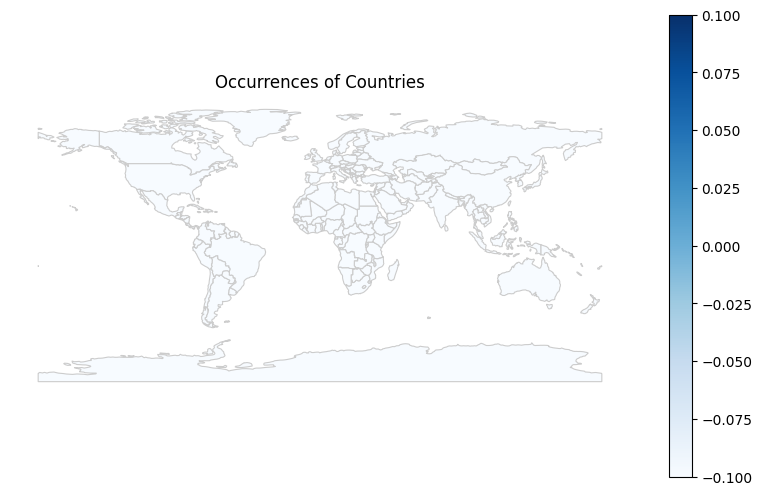

In [62]:
map_countries_occurrences(list(region_count.index)[0])

In [68]:
def print_non_countries(country_list):
    recognized_countries = {
        'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
        'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
        'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
        'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
        'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
        'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
        'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
        'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
        'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
        'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica',
        'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Korea', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos',
        'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg',
        'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania',
        'Mauritius', 'Mexico', 'Micronesia', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco',
        'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua',
        'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Panama',
        'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania',
        'Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines',
        'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles',
        'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa',
        'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan',
        'Tajikistan', 'Tanzania', 'Thailand', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey',
        'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
        'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Vatican City', 'Venezuela', 'Vietnam',
        'Yemen', 'Zambia', 'Zimbabwe'
    }

    non_countries = [country for country in country_list if country not in recognized_countries]

    if len(non_countries) > 0:
        return(non_countries)
    else:
        print("No non-country names found in the list.")
        return -1


# Example usage
countries = print_non_countries(list(region_count.index))

In [70]:
len(countries)

44

In [85]:
def check_non_recognized(recognized_countries, country, my_dictionary):
    if country not in recognized_countries:
        return my_dictionary[country]
    else:
        return [country]

In [84]:
recognized_countries = {
        'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina',
        'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
        'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana',
        'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
        'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
        'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica',
        'Dominican Republic', 'East Timor', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
        'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany',
        'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras',
        'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica',
        'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Korea', 'Kosovo', 'Kuwait', 'Kyrgyzstan', 'Laos',
        'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg',
        'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania',
        'Mauritius', 'Mexico', 'Micronesia', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco',
        'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua',
        'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Panama',
        'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania',
        'Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines',
        'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles',
        'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa',
        'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan',
        'Tajikistan', 'Tanzania', 'Thailand', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey',
        'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
        'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Vatican City', 'Venezuela', 'Vietnam',
        'Yemen', 'Zambia', 'Zimbabwe'
    }

In [83]:
my_dictionary = {
  'Anglosphere': ['Australia', 'Canada', 'New Zealand', 'United Kingdom', 'United States'],
  'USA': ['United States'],
  'la Francophonie': ['Canada', 'France', 'Belgium', 'Switzerland'],
  'Hispanophone': ['Spain', 'Mexico', 'Argentina', 'Colombia'],
  'Shanghai': ['China'],
  'Hong Kong': ['Hong Kong'],
  'MENA': ['Algeria', 'Bahrain', 'Egypt', 'Iran', 'Iraq', 'Jordan', 'Kuwait', 'Lebanon', 'Libya', 'Morocco', 'Oman', 'Qatar', 'Saudi Arabia', 'Sudan', 'Syria', 'Tunisia', 'United Arab Emirates', 'Yemen'],
  'UK': ['United Kingdom'],
  'EU': ['Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia', 'Spain', 'Sweden'],
  'South Korea': ['South Korea'],
  'Jiangsu': ['China'],
  'African Union': ['Multiple countries in Africa'],
  'Zhejiang': ['China'],
  'Henan': ['China'],
  'Hainan': ['China'],
  'Hubei': ['China'],
  'Fujian': ['China'],
  'UN': ['United Nations'],
  'Türkiye': ['Turkey'],
  'Xinjiang': ['China'],
  'Yunnan': ['China'],
  'Sichuan': ['China'],
  'Guangxi': ['China'],
  'Shaanxi': ['China'],
  'Jilin': ['China'],
  'Hunan': ['China'],
  'UAE': ['United Arab Emirates'],
  'Dem. Rep. of Congo': ['Democratic Republic of the Congo'],
  'Czech Rep.': ['Czech Republic'],
  'Lusophone': ['Angola', 'Brazil', 'Cape Verde', 'Guinea-Bissau', 'Mozambique', 'Portugal', 'São Tomé and Príncipe'],
  'East African Community': ['Burundi', 'Kenya', 'Rwanda', 'South Sudan', 'Tanzania', 'Uganda'],
  'Jiangxi': ['China'],
  'Beijing': ['China'],
  'Chongqing': ['China'],
  'Guangdong': ['China'],
  'Shanxi': ['China'],
  'Gansu': ['China'],
  'São Tomé and Príncipe': ['São Tomé and Príncipe'],
  'Heilongjiang': ['China'],
  'Anhui': ['China'],
  'Shandong': ['China'],
  'Tibet': ['China'],
  'ASEAN': ['Brunei', 'Cambodia', 'Indonesia', 'Laos', 'Malaysia', 'Myanmar', 'Philippines', 'Singapore', 'Thailand', 'Vietnam'],
  'Rep. of Congo': ['Republic of the Congo']
}

In [86]:
all_list = []
for region in list(df['Region of Focus'].values):
   all_list.append(check_non_recognized(recognized_countries, region, my_dictionary))

In [87]:
all_list

[['Australia', 'Canada', 'New Zealand', 'United Kingdom', 'United States'],
 ['Australia', 'Canada', 'New Zealand', 'United Kingdom', 'United States'],
 ['China'],
 ['Afghanistan'],
 ['Australia', 'Canada', 'New Zealand', 'United Kingdom', 'United States'],
 ['China'],
 ['Switzerland'],
 ['Austria'],
 ['Indonesia'],
 ['United Arab Emirates'],
 ['Austria',
  'Belgium',
  'Bulgaria',
  'Croatia',
  'Cyprus',
  'Czech Republic',
  'Denmark',
  'Estonia',
  'Finland',
  'France',
  'Germany',
  'Greece',
  'Hungary',
  'Ireland',
  'Italy',
  'Latvia',
  'Lithuania',
  'Luxembourg',
  'Malta',
  'Netherlands',
  'Poland',
  'Portugal',
  'Romania',
  'Slovakia',
  'Slovenia',
  'Spain',
  'Sweden'],
 ['France'],
 ['Multiple countries in Africa'],
 ['Cyprus'],
 ['Lesotho'],
 ['Iran'],
 ['Serbia'],
 ['Saudi Arabia'],
 ['Burundi'],
 ['Cameroon'],
 ['Democratic Republic of the Congo'],
 ['Chad'],
 ['Italy'],
 ['United States'],
 ['Bulgaria'],
 ['Trinidad and Tobago'],
 ['Italy'],
 ['Japan'],
 

In [80]:
str(countries)

"['Anglosphere', 'USA', 'la Francophonie', 'Hispanophone', 'Shanghai', 'Hong Kong', 'MENA', 'UK', 'EU', 'South Korea', 'Jiangsu', 'African Union', 'Zhejiang', 'Henan', 'Hainan', 'Hubei', 'Fujian', 'UN', 'Türkiye', 'Xinjiang', 'Yunnan', 'Sichuan', 'Guangxi', 'Shaanxi', 'Jilin', 'Hunan', 'UAE', 'Dem. Rep. of Congo', 'Czech Rep.', 'Lusophone', 'East African Community', 'Jiangxi', 'Beijing', 'Chongqing', 'Guangdong', 'Shanxi', 'Gansu', 'São Tomé and Príncipe', 'Heilongjiang', 'Anhui', 'Shandong', 'Tibet', 'ASEAN', 'Rep. of Congo']"

In [78]:
with open('temp.txt', 'w') as file:
    file.write(str(countries))

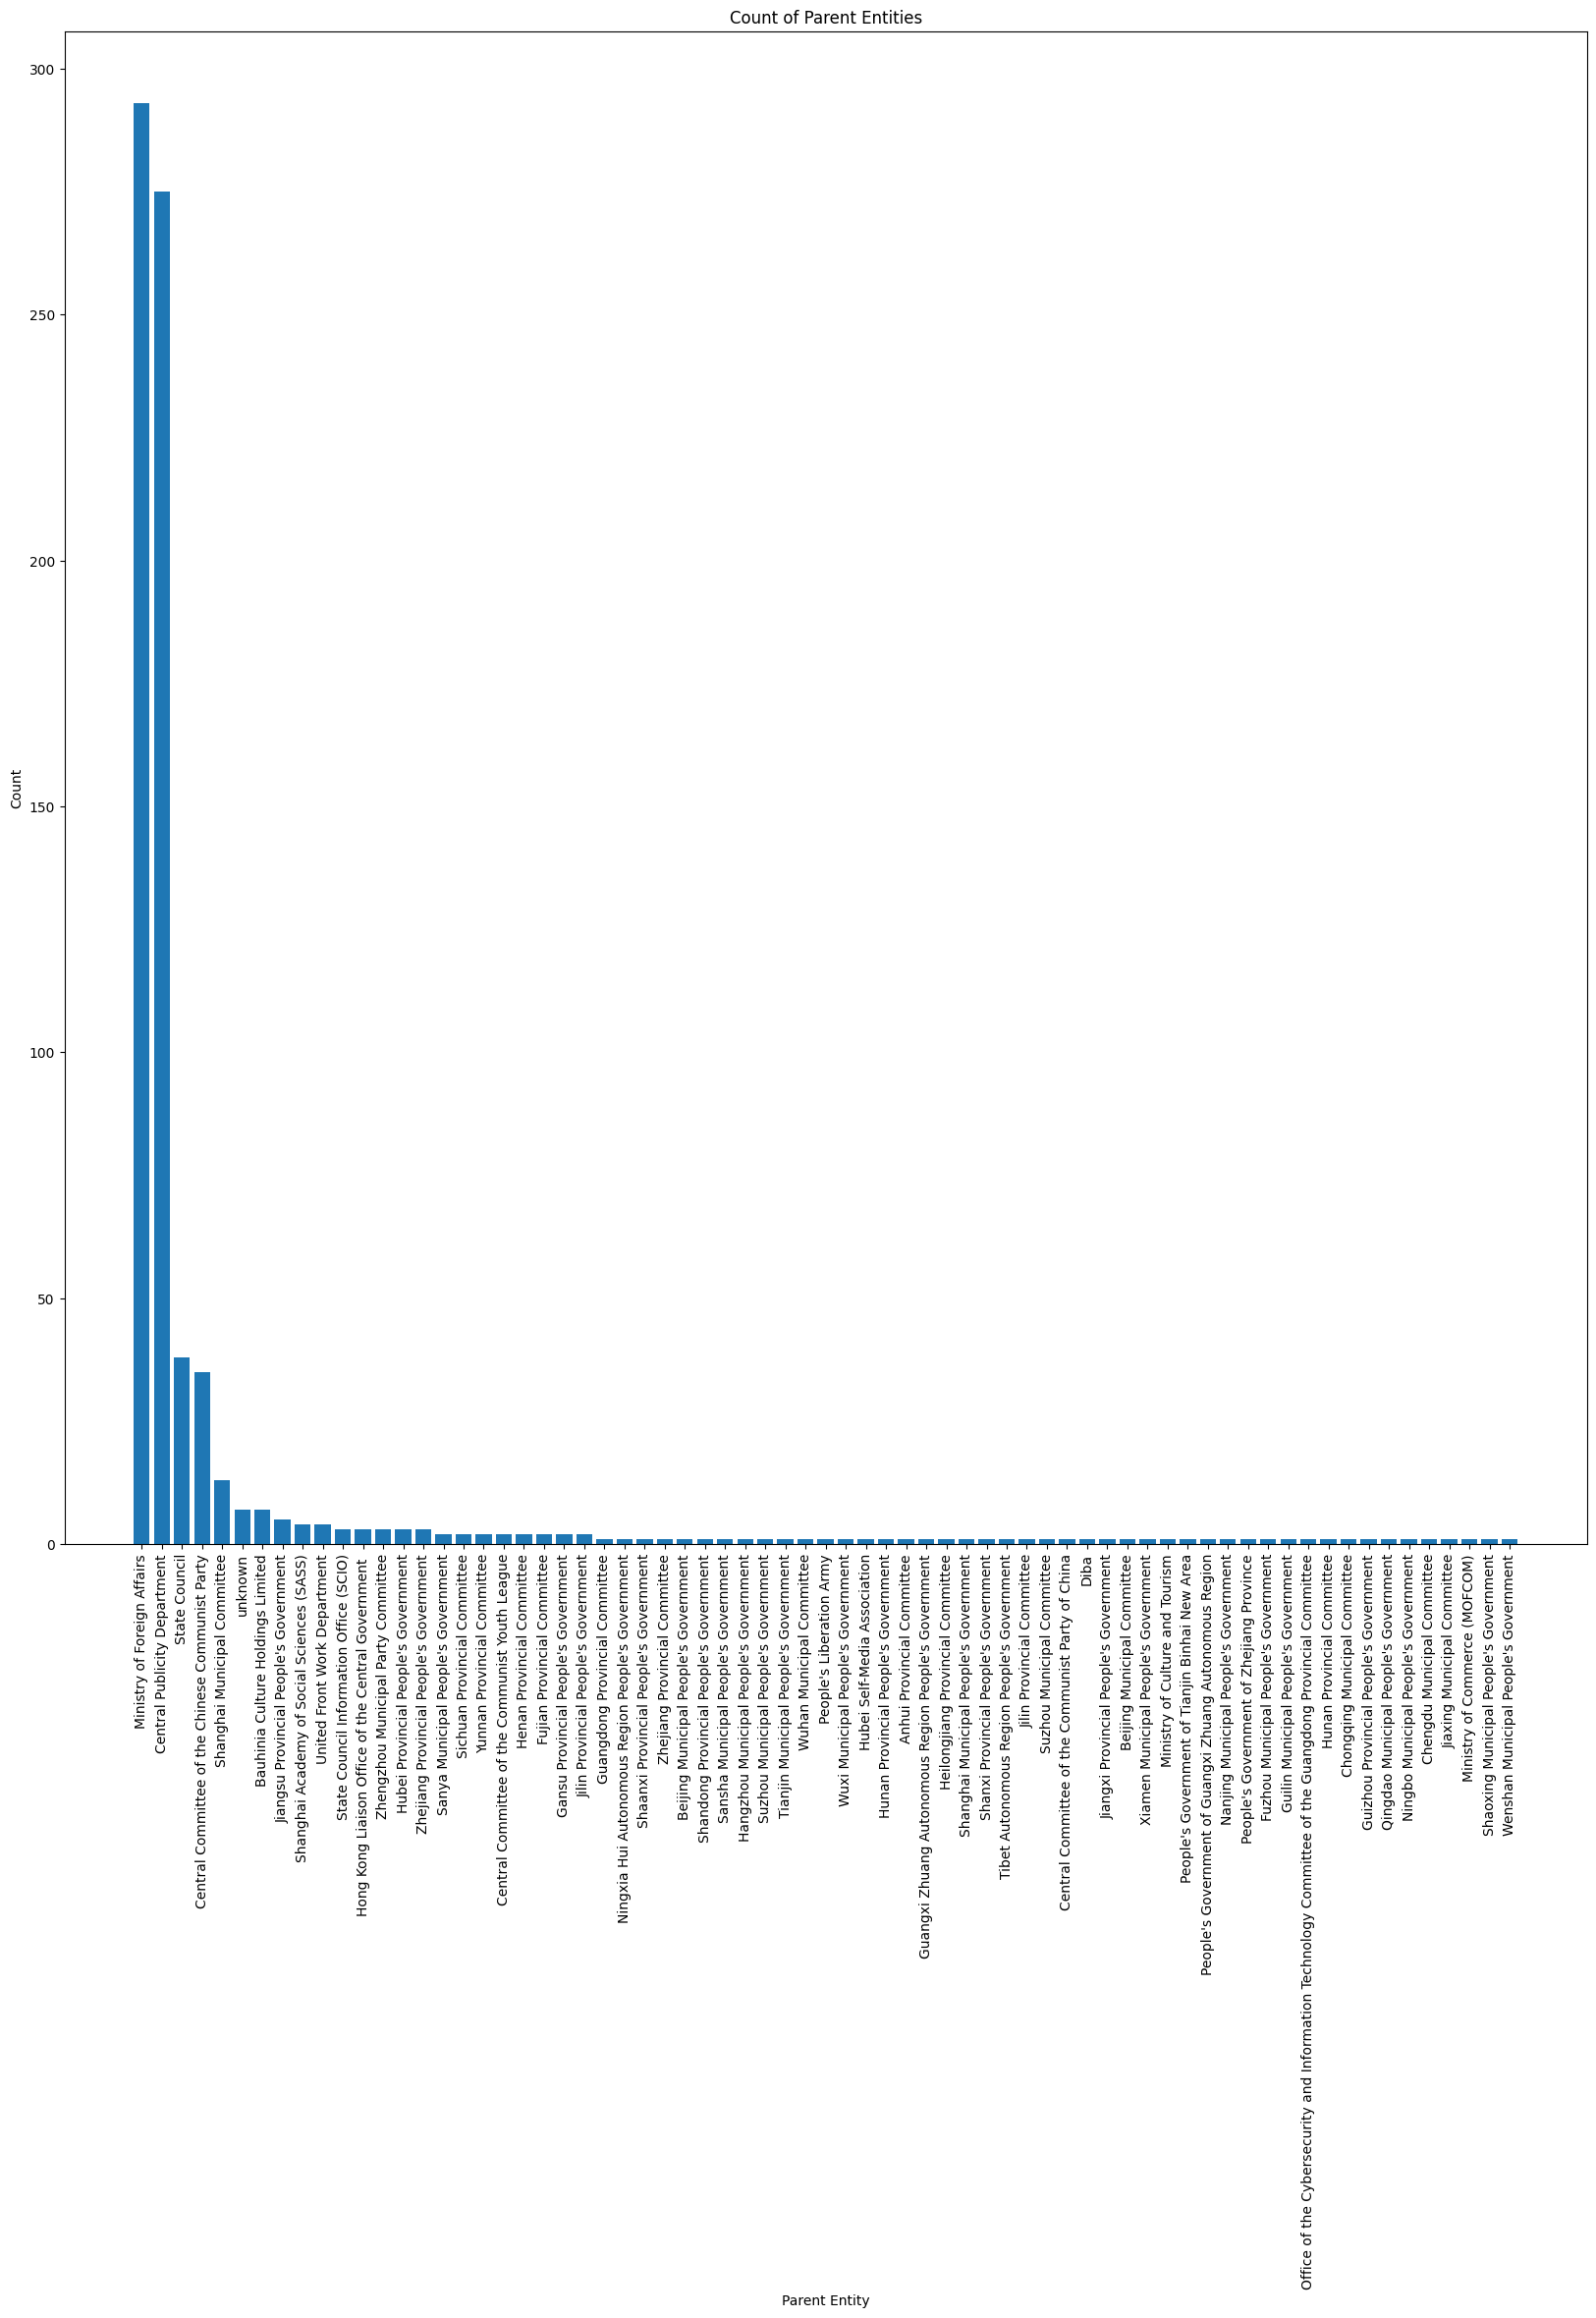

In [44]:
plt.figure(figsize=(20, 20))
# Create the bar plot
plt.bar(temp_series.index, temp_series.values)

# Customize the plot
plt.title('Count of Parent Entities')
plt.xlabel('Parent Entity')
plt.ylabel('Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [47]:
import streamlit as st
import pandas as pd
import numpy as np

df = pd.DataFrame(
    np.random.randn(1000, 2) / [50, 50] + [37.76, -122.4],
    columns=['lat', 'lon'])

st.map(df)

DeltaGenerator()